In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from numpy import log as ln
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
from ast import literal_eval
import json 
from pandas.io.json import json_normalize
from sklearn import linear_model
from linearmodels.datasets import wage_panel

In [328]:
df = pd.read_csv(r'C:\Users\kentj\Desktop\8Props\Resale from May 2016 to May 2021\Privateresale1.csv')

In [329]:
df.shape

(120925, 17)

In [330]:
df['year'] = df['Date of Sale'].str.split('/').apply(lambda x: x[-1])
df['month'] = df['Date of Sale'].str.split('/').apply(lambda x: x[-2])
df.head()
#extracting date and month info. 

,Column1,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,year,month
0,0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,1/5/2021,2021,5
1,1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,1/5/2021,2021,5
2,2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,1/5/2021,2021,5
3,3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,1/5/2021,2021,5
4,4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,1/5/2021,2021,5


In [331]:
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df['Date of Sale'] = df['Date of Sale'].dt.strftime('%Y-%d-%m') 

In [302]:
df.head()

,Column1,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,year,month
0,0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5
1,1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5
2,2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5
3,3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5
4,4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5


In [332]:
df = df.drop('Column1', axis =1) #drop useless columns

In [333]:
df.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,year,month
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5


In [305]:
df.info() #check data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120925 entries, 0 to 120924
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   S/N                120925 non-null  int64 
 1   Project Name       120925 non-null  object
 2   Street Name        120925 non-null  object
 3   Type               120925 non-null  object
 4   Postal District    120925 non-null  int64 
 5   Market Segment     120925 non-null  object
 6   Tenure             120921 non-null  object
 7   Type of Sale       120925 non-null  object
 8   No. of Units       120925 non-null  int64 
 9   Price ($)          120925 non-null  int64 
 10  Nett Price ($)     120925 non-null  object
 11  Area (Sqft)        120925 non-null  int64 
 12  Type of Area       120925 non-null  object
 13  Floor Level        120925 non-null  object
 14  Unit Price ($psf)  120925 non-null  int64 
 15  Date of Sale       120925 non-null  object
 16  year               1

In [306]:
df.isnull().sum() #checking for nulls

S/N                  0
Project Name         0
Street Name          0
Type                 0
Postal District      0
Market Segment       0
Tenure               4
Type of Sale         0
No. of Units         0
Price ($)            0
Nett Price ($)       0
Area (Sqft)          0
Type of Area         0
Floor Level          0
Unit Price ($psf)    0
Date of Sale         0
year                 0
month                0
dtype: int64

In [334]:
df.fillna('NA', inplace = True) 

In [335]:
df.isnull().sum()

S/N                  0
Project Name         0
Street Name          0
Type                 0
Postal District      0
Market Segment       0
Tenure               0
Type of Sale         0
No. of Units         0
Price ($)            0
Nett Price ($)       0
Area (Sqft)          0
Type of Area         0
Floor Level          0
Unit Price ($psf)    0
Date of Sale         0
year                 0
month                0
dtype: int64

In [336]:
df['tenure_start'] = df.Tenure.str.split(' ').apply(lambda x: x[-1])

In [310]:
df.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,year,month,tenure_start
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005


In [337]:
df['lease_years'] = df.Tenure.str.split(' ').apply(lambda x: x[0])

In [312]:
df.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,year,month,tenure_start,lease_years
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99


In [338]:
df.columns = df.columns.str.replace(' ','_')

# Exploratory Data Analysis Part 1

Lowest unit price psf: $526
Highest unit price psf: $5838


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


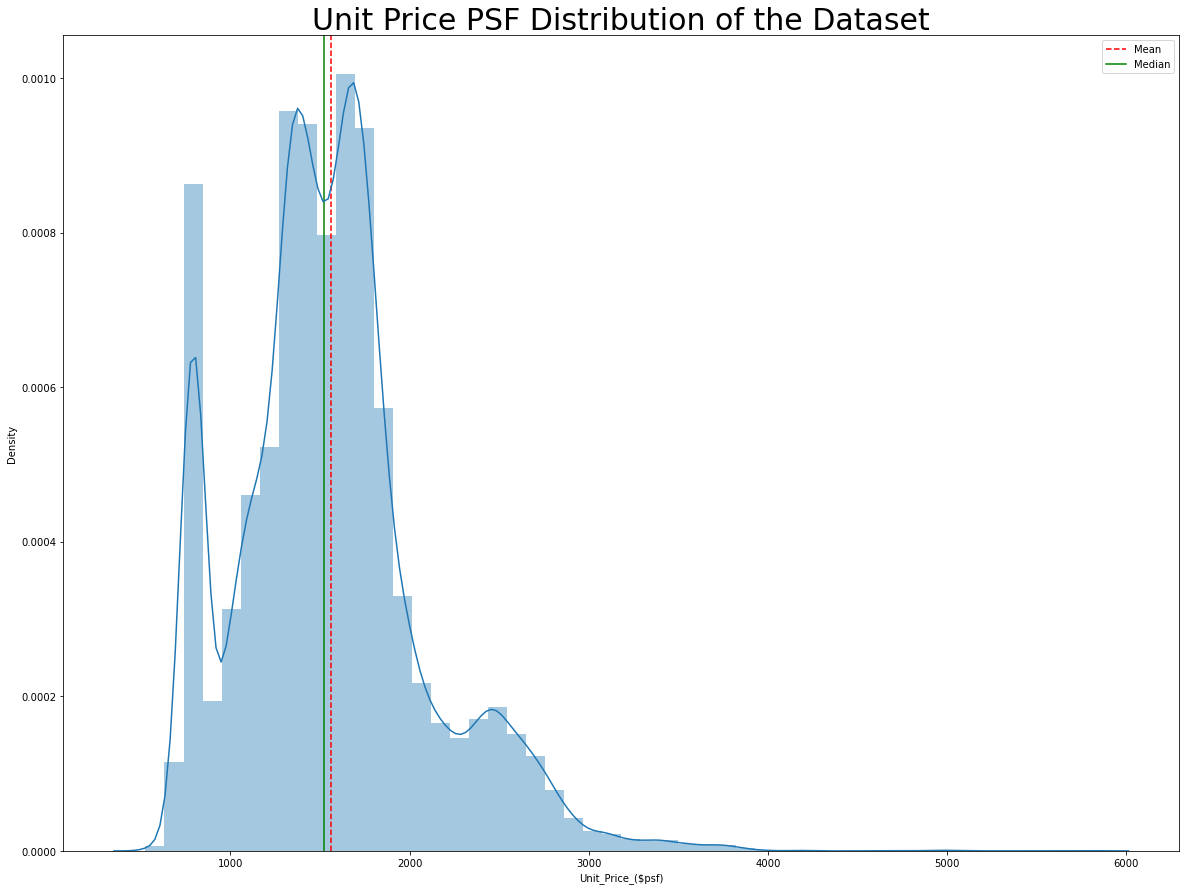

In [275]:
cond1 = df['Type_of_Sale'] == 'New Sale'
df1 = df[cond1] #There is a total of 56292 New Sale between Jun-16 - May 21 

print('Lowest unit price psf: $' + str(df1['Unit_Price_($psf)'].min()))
print('Highest unit price psf: $' + str(df1['Unit_Price_($psf)'].max()))

plt.figure(figsize= (20, 15))
plt.title('Unit Price PSF Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df1['Unit_Price_($psf)'].mean()
median=df1['Unit_Price_($psf)'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df1['Unit_Price_($psf)']);

Lowest unit price psf: $33
Highest unit price psf: $6024


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


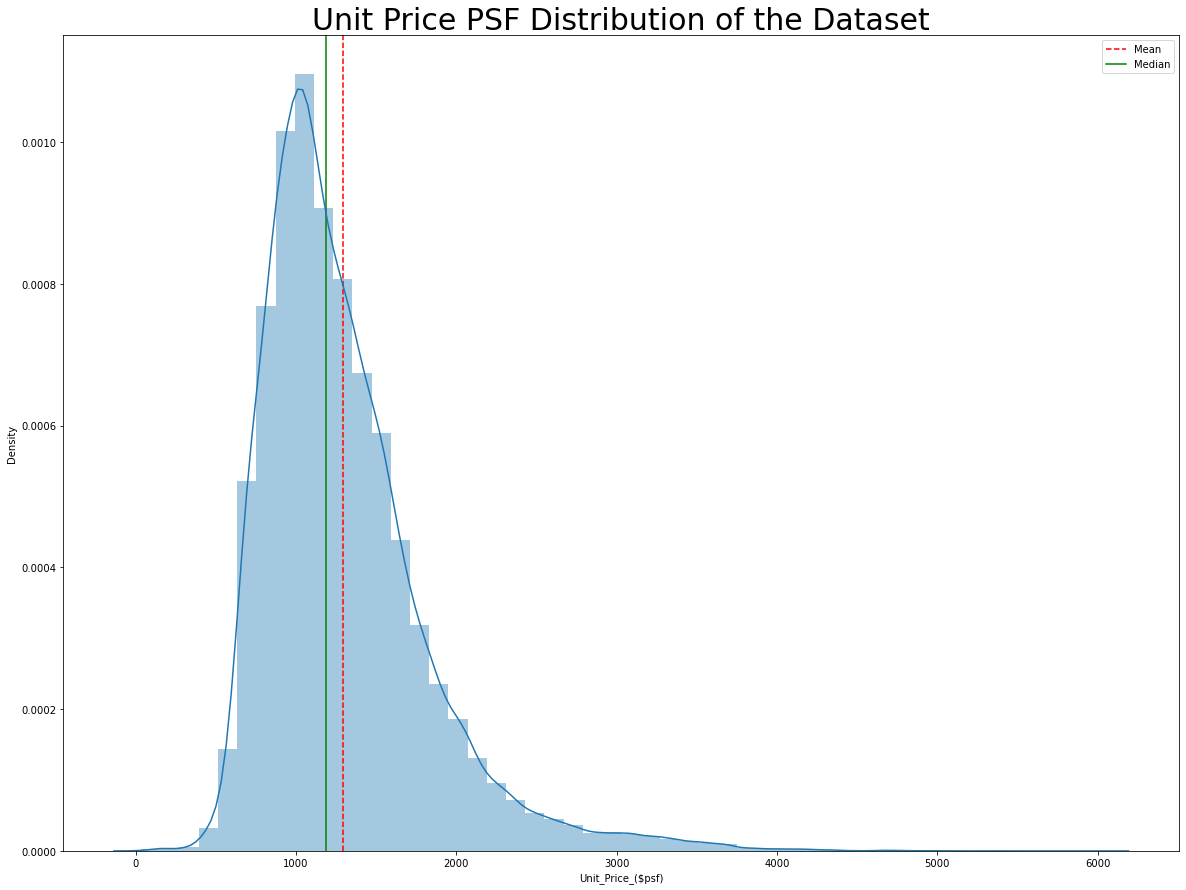

In [274]:
cond2 = df['Type_of_Sale'] == 'Resale'
df2 = df[cond2] 

print('Lowest unit price psf: $' + str(df2['Unit_Price_($psf)'].min()))
print('Highest unit price psf: $' + str(df2['Unit_Price_($psf)'].max()))

plt.figure(figsize= (20, 15))
plt.title('Unit Price PSF Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df2['Unit_Price_($psf)'].mean()
median=df2['Unit_Price_($psf)'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df2['Unit_Price_($psf)']);

Lowest price :40000
Highest price :980000000


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


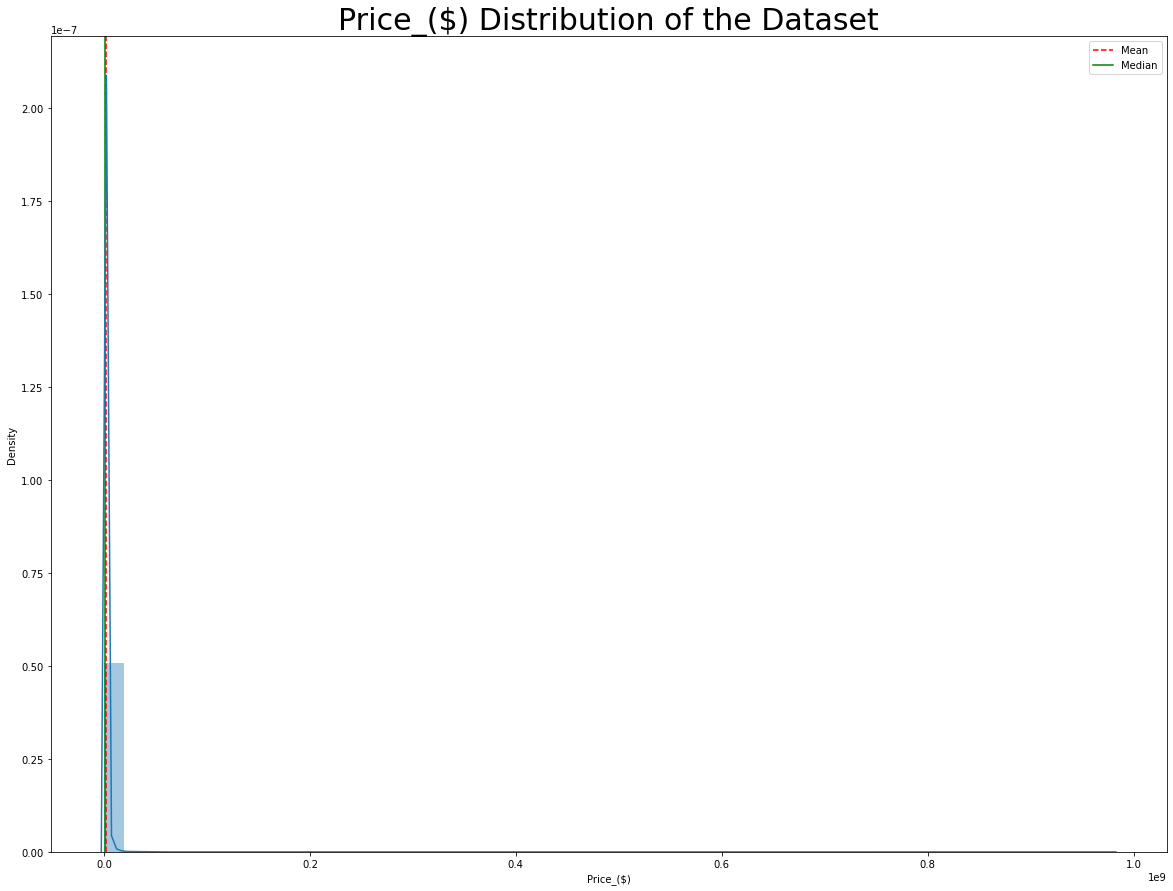

In [276]:
print('Lowest price :' + str(df['Price_($)'].min()))
print('Highest price :' + str(df['Price_($)'].max()))

plt.figure(figsize= (20, 15))
plt.title('Price_($) Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df['Price_($)'].mean()
median=df['Price_($)'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df['Price_($)']);

# the price distribution is extremely skewed, hence we will need to normalize with log price. b

In [314]:
df['lnprice'] = ln(df['Price_($)'])
df.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years,lnprice
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99,14.247293
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99,15.199023
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99,14.396608
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99,14.187074
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99,14.837961


Lowest price :10.596634733096073
Highest price :20.70306312962889


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


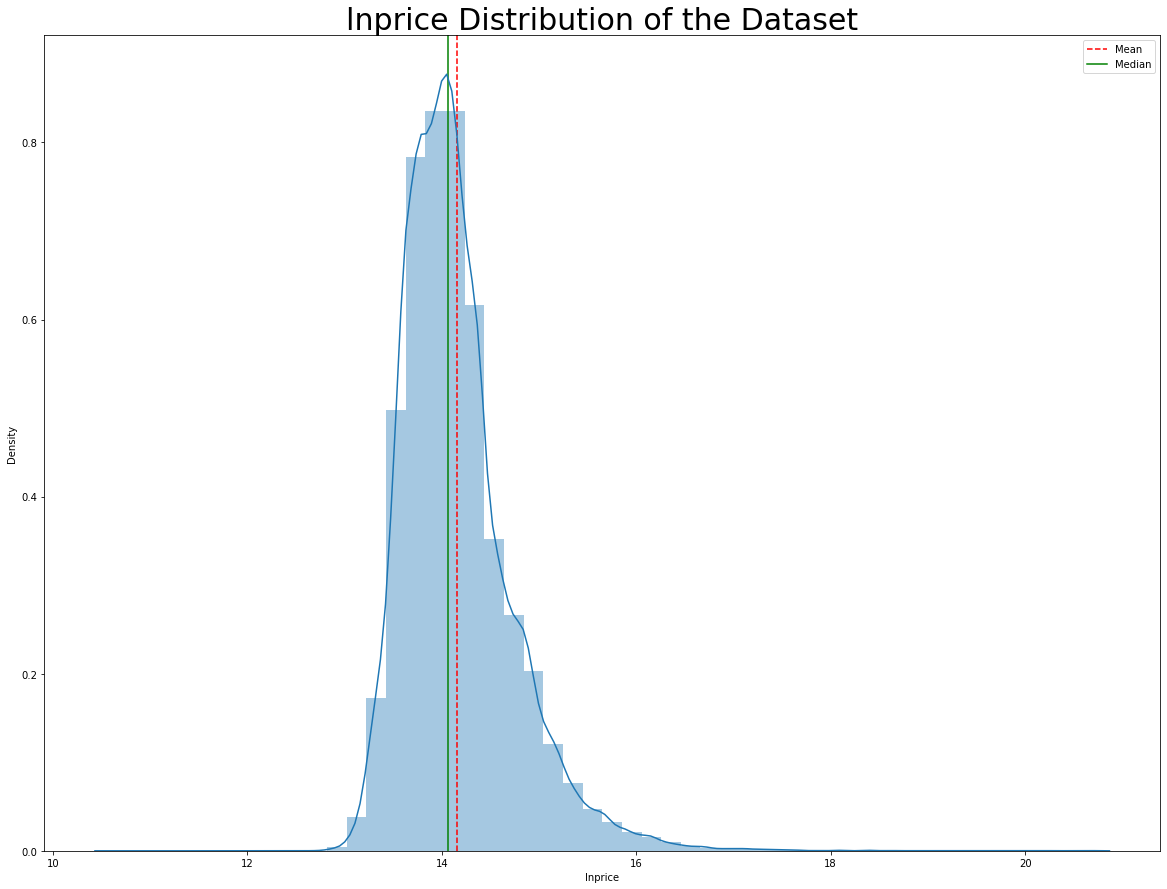

In [278]:
cond1 = df['Type_of_Sale'] == 'New Sale'
df1 = df[cond1]

print('Lowest price :' + str(df1['lnprice'].min()))
print('Highest price :' + str(df1['lnprice'].max()))

plt.figure(figsize= (20, 15))
plt.title('lnprice Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df1['lnprice'].mean()
median=df1['lnprice'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df1['lnprice']);

#distribution is normalized 

Lowest price :12.782686009834167
Highest price :17.354671163828268


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


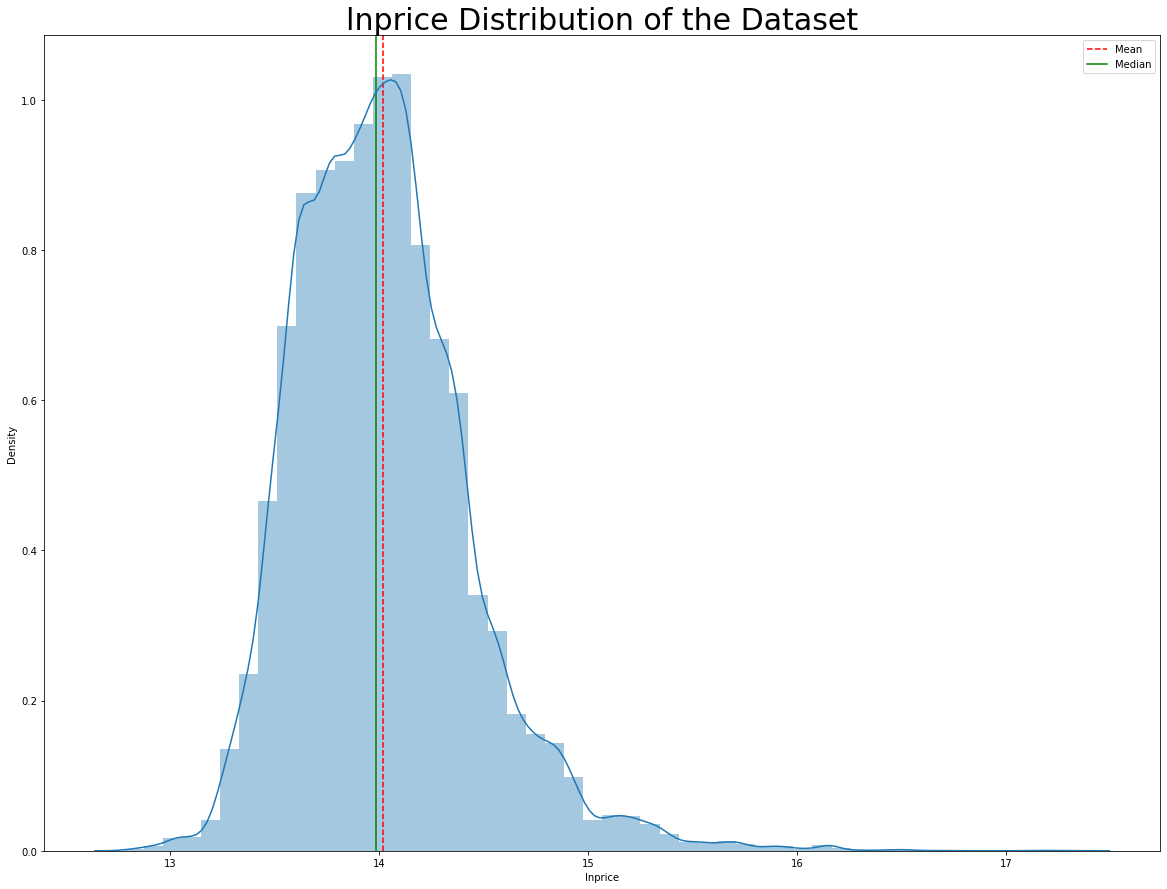

# New Sale
1. Unit Price psf is slightly positively skewed. 
2. The mean and median are slightly towards the left. 
# Resale 
1. Unit price psf is also slightly positvely skewed. 
2. The mean and median are slightly towards the left as well. 
3. Resale as a smoother distribution as compared to the New sale. 

   year  count
0  2021   6336
1  2016   7029
2  2018   9365
3  2019   9451
4  2020  10416
5  2017  13695


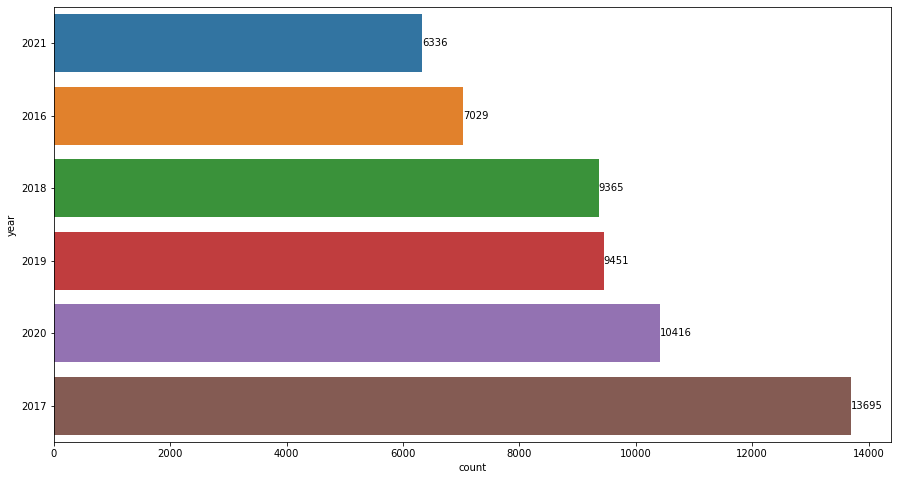

In [271]:
cond1 = df['Type_of_Sale'] == 'New Sale'
df1 = df[cond1] 

New_sale = pd.DataFrame(df1['year'].value_counts().sort_values().reset_index())
New_sale = New_sale.rename(columns={"index": "year", "year": "count"})
print(New_sale)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'count', y = 'year', data = New_sale)
for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

   year  count
0  2016   5372
1  2021   7922
2  2019   9738
3  2020  12018
4  2018  13746
5  2017  14296


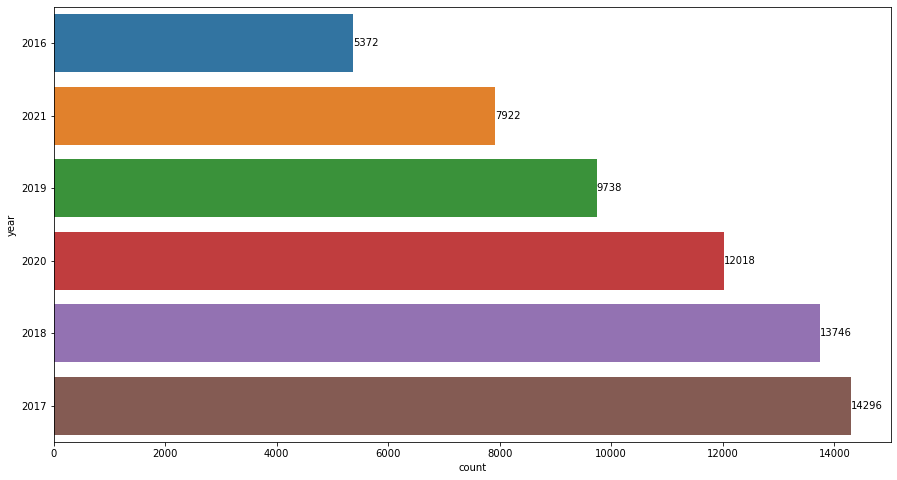

In [270]:
cond2 = df['Type_of_Sale'] == 'Resale'
df2 = df[cond2]

Resale = pd.DataFrame(df2['year'].value_counts().sort_values().reset_index())
Resale = Resale.rename(columns={"index": "year", "year": "count"})
print(Resale)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'count', y = 'year', data = Resale)
for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

In [280]:
df.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years,lnprice
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99,14.247293
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99,15.199023
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99,14.396608
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99,14.187074
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99,14.837961


In [ ]:
df.to_csv(r'C:\Users\kentj\Desktop\8Props\Resale from May 2016 to May 2021\Privateresale1(EDA).csv', index = False)

# Exploratory Data Analysis Part 2

We will now conduct some Exploratory Data Analysis. We will like to visualize some relationships between the variables, so see if we can draw some insights. 

1. Floor Level against Price 


In [31]:
cond1 = df['Type of Sale'] == 'New Sale'
df1 = df[cond1] #There is a total of 56292 New Sale between Jun-16 - May 21 

In [32]:
cond2 = df1['Floor Level'] != '-'
df2 = df1[cond2]

In [33]:
df2['Floor Level'].value_counts()

01 to 05    16452
06 to 10    15089
11 to 15    12057
16 to 20     5477
21 to 25     2593
26 to 30     1523
31 to 35     1259
36 to 40      683
41 to 45      215
46 to 50       60
51 to 55       17
56 to 60        8
Name: Floor Level, dtype: int64

In [34]:
df2['storey1'] = df2['Floor Level'].str.split(' ').apply(lambda x: x[0]) #retrieving first element
df2['storey2'] = df2['Floor Level'].str.split(' ').apply(lambda x: x[-1]) #retrieving the last element

df2['storey1'] = df2['storey1'].astype(int) #converting to int
df2['storey2'] = df2['storey2'].astype(int)

df2['avg_storey'] = (df2['storey1'] + df2['storey2']) / 2 # getting average 
df2['avg_storey'].astype(int)
df2.head()

<ipython-input-34-997477d6abfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['storey1'] = df2['Floor Level'].str.split(' ').apply(lambda x: x[0]) #retrieving first element
<ipython-input-34-997477d6abfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['storey2'] = df2['Floor Level'].str.split(' ').apply(lambda x: x[-1]) #retrieving the last element
<ipython-input-34-997477d6abfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,tenure_start,lease_years,storey1,storey2,avg_storey
9,10,SKY EVERTON,EVERTON ROAD,Apartment,2,RCR,Freehold,New Sale,1,3744000,-,1346,Strata,26 to 30,2783,2021-05-01,Freehold,Freehold,26,30,28.0
10,11,RIVIERE,JIAK KIM STREET,Apartment,3,RCR,99 yrs lease commencing from 2018,New Sale,1,3196800,-,1249,Strata,16 to 20,2560,2021-05-01,2018,99,16,20,18.0
11,12,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 yrs lease commencing from 2019,New Sale,1,2067000,-,1249,Strata,06 to 10,1655,2021-05-01,2019,99,6,10,8.0
12,13,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,2135000,-,1195,Strata,11 to 15,1787,2021-05-01,2019,99,11,15,13.0
13,14,AVENUE SOUTH RESIDENCE,SILAT AVENUE,Apartment,3,RCR,99 yrs lease commencing from 2018,New Sale,1,1610000,-,732,Strata,41 to 45,2200,2021-05-01,2018,99,41,45,43.0


In [35]:
df2['avg_storey'].value_counts()

3.0     16452
8.0     15089
13.0    12057
18.0     5477
23.0     2593
28.0     1523
33.0     1259
38.0      683
43.0      215
48.0       60
53.0       17
58.0        8
Name: avg_storey, dtype: int64

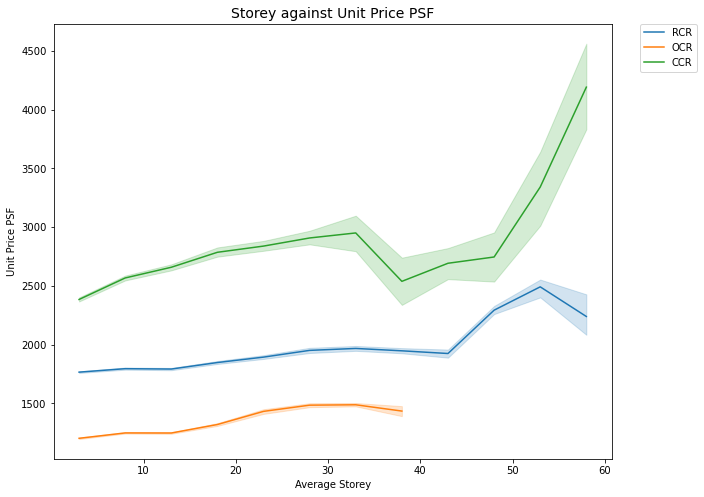

In [36]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.lineplot(x = 'avg_storey', y = 'Unit Price ($psf)', data = df2, hue ='Market Segment' )

plt.xlabel("Average Storey", size = 10)
plt. ylabel("Unit Price PSF", size = 10)
plt.title("Storey against Unit Price PSF", size = 14)
plt.legend()
#plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#central areas have the highest gradient, as comparable to other towns.

In [38]:
cond1 = df['Type of Sale'] == 'Resale'
df1 = df[cond1] #There is a total of 56292 New Sale between Jun-16 - May 21 
cond2 = df1['Floor Level'] != '-'
df2 = df1[cond2]

In [45]:
df2['Floor Level'].value_counts()

01 to 05    22636
06 to 10    13439
11 to 15     8393
16 to 20     4283
21 to 25     1943
26 to 30     1237
31 to 35      701
36 to 40      271
41 to 45      118
46 to 50       84
51 to 55       48
56 to 60       29
61 to 65       29
66 to 70       20
71 to 75        4
Name: Floor Level, dtype: int64

In [44]:
cond3 = df2['Floor Level'] != 'B1 to B5'
df2 = df2[cond3]
df2.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,tenure_start,lease_years
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2002,99
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2014,99
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2002,99
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2005,99
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2005,99


In [46]:
df2['storey1'] = df2['Floor Level'].str.split(' ').apply(lambda x: x[0]) #retrieving first element
df2['storey2'] = df2['Floor Level'].str.split(' ').apply(lambda x: x[-1]) #retrieving the last element

df2['storey1'] = df2['storey1'].astype(int) #converting to int
df2['storey2'] = df2['storey2'].astype(int)

df2['avg_storey'] = (df2['storey1'] + df2['storey2']) / 2 # getting average 
df2['avg_storey'].astype(int)
df2.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,tenure_start,lease_years,storey1,storey2,avg_storey
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2002,99,21,25,23.0
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2014,99,21,25,23.0
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2002,99,6,10,8.0
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2005,99,21,25,23.0
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2005,99,1,5,3.0


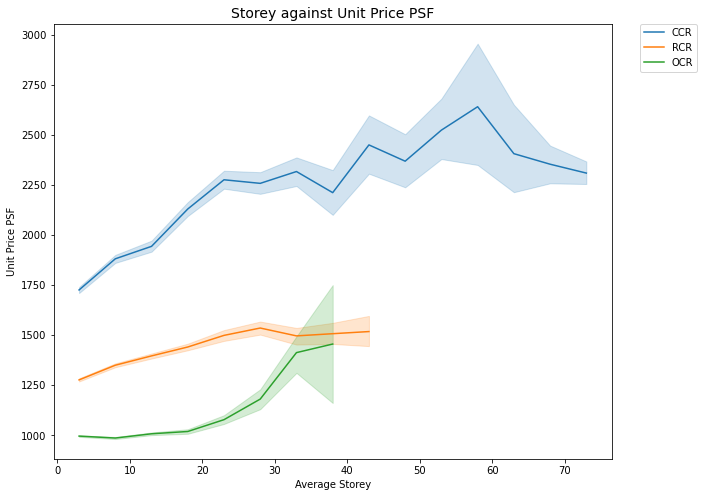

In [47]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.lineplot(x = 'avg_storey', y = 'Unit Price ($psf)', data = df2, hue ='Market Segment' )

plt.xlabel("Average Storey", size = 10)
plt. ylabel("Unit Price PSF", size = 10)
plt.title("Storey against Unit Price PSF", size = 14)
plt.legend()
#plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#central areas have the highest gradient, as comparable to other towns.

Comparing the resale and the New sale market, resale market do have a more obvious trend of higher unit price psf against average storey. 

# Question 1:
I am interested to find out, which Market Segment and Postal Districts are developer building new apartments over the years. specifically: 
1. How many new houses was built? What are their types?
2. What market segment/districts are the developers building?
3. What Type of houses are they building in each districts? 

In [50]:
#in order to find out the houses that developers are building, we have to filter out all the new sale under type of sale 
cond1 = df['Type of Sale'] == 'New Sale'
df[cond1] #There is a total of 56292 New Sale between Jun-16 - May 21 

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,tenure_start,lease_years
9,10,SKY EVERTON,EVERTON ROAD,Apartment,2,RCR,Freehold,New Sale,1,3744000,-,1346,Strata,26 to 30,2783,2021-05-01,Freehold,Freehold
10,11,RIVIERE,JIAK KIM STREET,Apartment,3,RCR,99 yrs lease commencing from 2018,New Sale,1,3196800,-,1249,Strata,16 to 20,2560,2021-05-01,2018,99
11,12,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 yrs lease commencing from 2019,New Sale,1,2067000,-,1249,Strata,06 to 10,1655,2021-05-01,2019,99
12,13,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,2135000,-,1195,Strata,11 to 15,1787,2021-05-01,2019,99
13,14,AVENUE SOUTH RESIDENCE,SILAT AVENUE,Apartment,3,RCR,99 yrs lease commencing from 2018,New Sale,1,1610000,-,732,Strata,41 to 45,2200,2021-05-01,2018,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120894,469,BELGRAVIA VILLAS,BELGRAVIA DRIVE,Strata Terrace,28,OCR,Freehold,New Sale,1,2800000,-,3584,Strata,-,781,2016-11-01,Freehold,Freehold
120895,470,BELGRAVIA VILLAS,BELGRAVIA DRIVE,Strata Terrace,28,OCR,Freehold,New Sale,1,2650000,-,3584,Strata,-,739,2016-11-01,Freehold,Freehold
120896,471,BELGRAVIA VILLAS,BELGRAVIA DRIVE,Strata Terrace,28,OCR,Freehold,New Sale,1,2550000,-,3584,Strata,-,711,2016-11-01,Freehold,Freehold
120916,491,BELGRAVIA VILLAS,BELGRAVIA DRIVE,Strata Terrace,28,OCR,Freehold,New Sale,1,2910000,-,3638,Strata,-,800,2016-07-01,Freehold,Freehold


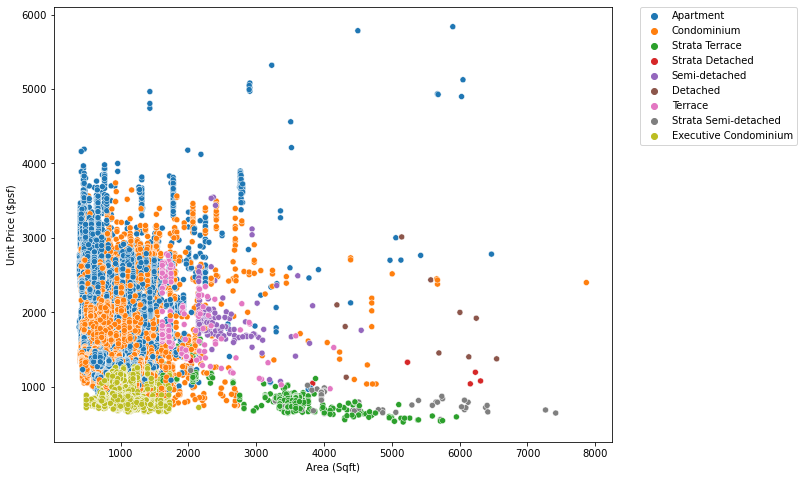

In [52]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.scatterplot(x = 'Area (Sqft)', y = 'Unit Price ($psf)', data = df[cond1], hue = 'Type') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [59]:
df[cond1].groupby('Type')[['S/N']].count().sort_values(by = 'S/N', ascending = True).reset_index()

,Type,S/N
0,Strata Detached,9
1,Detached,10
2,Strata Semi-detached,69
3,Semi-detached,139
4,Terrace,198
5,Strata Terrace,434
6,Executive Condominium,9331
7,Condominium,19517
8,Apartment,26585


<AxesSubplot:ylabel='Type'>

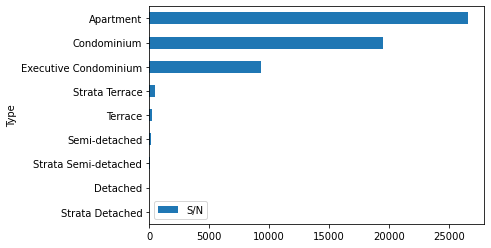

In [60]:
df[cond1].groupby('Type')[['S/N']].count().sort_values(by = 'S/N', ascending = True).plot(kind = 'barh')
#Developers have built 26585 Apartments, 19517 Condominium and 9331 Executive Condominiums over the past 5 years.

In [61]:
#Lets take a look where are the developers building the houses. 
df[cond1].groupby('Postal District')[['S/N']].count().sort_values(by ='S/N', ascending = False)
#district 19 - Hougang, Punggol, Sengkang, Serangoon 
#district 5 - Buona Vista, West Coast, Clementi New Town 
#district 3 - Alexandra, Commonwealth 

,S/N
Postal District,
19,9888
5,6432
3,5494
18,4621
27,3749
14,3735
23,2925
13,2502
15,2033


In [62]:
#Display a list where the transactions are grouped by the districts, showing the different types of houses in the district. 

df2 = df[cond1].groupby(['Postal District', 'Type']).size().reset_index()

In [63]:
df2

,Postal District,Type,0
0,1,Apartment,330
1,2,Apartment,424
2,3,Apartment,3396
3,3,Condominium,2098
4,4,Condominium,402
...,...,...,...
83,28,Executive Condominium,7
84,28,Semi-detached,3
85,28,Strata Semi-detached,21
86,28,Strata Terrace,145


In [275]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Postal District  88 non-null     int64 
 1   Type             88 non-null     object
 2   0                88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [64]:
#renaming the 0 column 
df2.rename({0: 'count'}, axis = 1, inplace =True)

In [65]:
df2

,Postal District,Type,count
0,1,Apartment,330
1,2,Apartment,424
2,3,Apartment,3396
3,3,Condominium,2098
4,4,Condominium,402
...,...,...,...
83,28,Executive Condominium,7
84,28,Semi-detached,3
85,28,Strata Semi-detached,21
86,28,Strata Terrace,145


In [66]:
cond2 = df2['Postal District'] == 19
df2[cond2]

,Postal District,Type,count
48,19,Apartment,5510
49,19,Condominium,739
50,19,Detached,1
51,19,Executive Condominium,3487
52,19,Semi-detached,6
53,19,Strata Semi-detached,19
54,19,Strata Terrace,114
55,19,Terrace,12


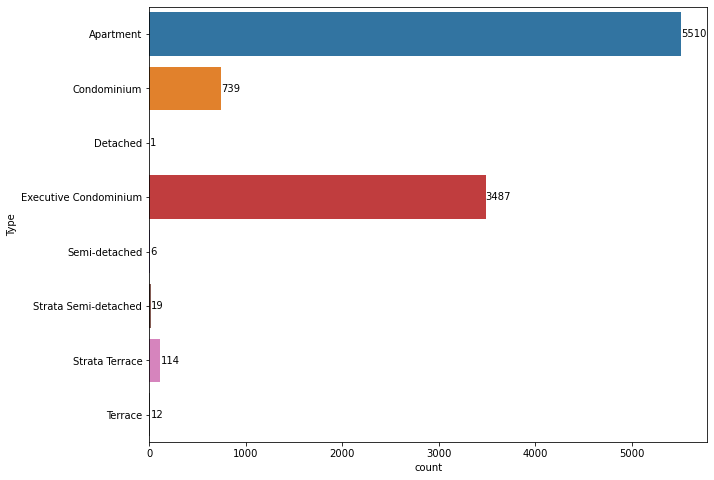

In [67]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.barplot(x='count', y = 'Type', data = df2[cond2])

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

In [68]:
cond3 = df2['Postal District'] == 5
df2[cond3]

,Postal District,Type,count
5,5,Apartment,5195
6,5,Condominium,1201
7,5,Strata Detached,3
8,5,Strata Terrace,33


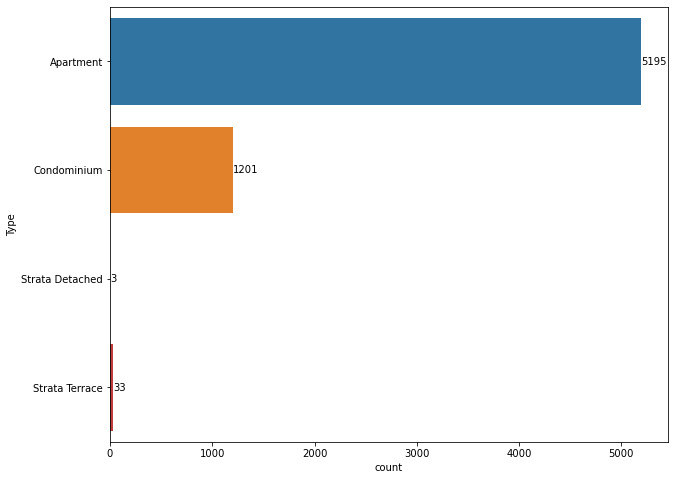

In [69]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.barplot(x='count', y = 'Type', data = df2[cond3])

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

In [70]:
cond4 = df2['Postal District'] == 3
df2[cond4]

,Postal District,Type,count
2,3,Apartment,3396
3,3,Condominium,2098


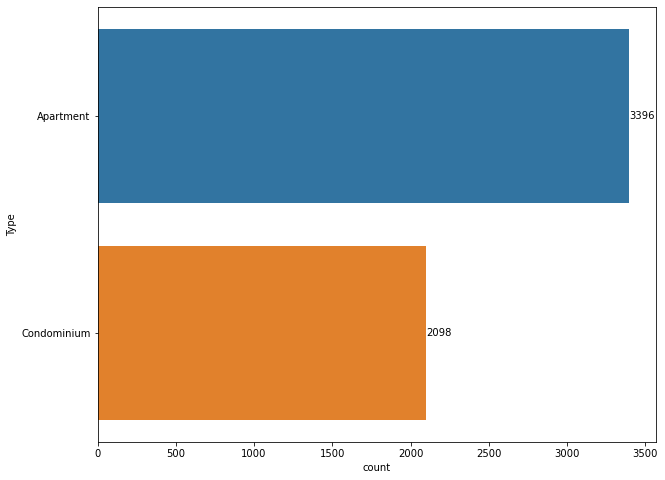

In [71]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.barplot(x='count', y = 'Type', data = df2[cond4])

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

As such, we can tell that Apartment is the most popular choice of accomodation among developers for the top 3 most popular districts. 

# Question 2 
1. which district is the most expensive in terms of new sale?
2. what are the median prices of the different districts in terms of new sale? 
3. In the top 3 most expensive districts - find out the total number and the types of their accomodation. 

In [79]:
df[cond1].groupby('Postal District')[['Unit Price ($psf)']].describe()
#overall descriptive statistics grouped by the Postal District. 

Unit Price ($psf)                                            \
                            count         mean         std     min      25%   
Postal District                                                               
1                           330.0  2482.069697  274.979510  1786.0  2301.25   
2                           424.0  2593.044811  364.674907  1795.0  2422.50   
3                          5494.0  1896.560976  276.065302  1037.0  1701.00   
4                           402.0  2262.733831  213.034685  1645.0  2161.25   
5                          6432.0  1545.847326  220.988475   871.0  1358.00   
7                           935.0  2612.742246  295.867333  1660.0  2421.00   
8                           363.0  1720.685950  203.631751  1035.0  1562.00   
9                          1856.0  2485.098060  393.158932  1624.0  2148.25   
10                         1470.0  2656.873469  587.795137   946.0  2310.00   
11                          361.0  2428.013850  439.955348   647.0  2301.00   
12                          745.0  1690.797315  307.154899   676.0  1496.00   
13                         2502.0  1676.220224  222.330715   965.0  1538.00   
14                         3735.0  1639.242570  196.563242   649.0  1508.00   
15                         2033.0  2026.681751  404.848340   660.0  1713.00   
16                         1039.0  1417.301251  157.255228   808.0  1342.00   
17                          435.0  1381.062069  140.418592  1121.0  1259.00   
18                         4621.0  1254.854793  161.060356   750.0  1125.00   
19                         9888.0  1259.586671  300.555860   526.0  1021.75   
20                         1546.0  1650.856404  172.385806   807.0  1627.00   
21                         1929.0  1835.837740  201.920155   607.0  1705.00   
22                         1080.0  1191.204630  252.726368   723.0   837.00   
23                         2925.0  1094.994872  350.614201   678.0   784.00   
25                          617.0   776.748784   46.773322   667.0   751.00   
26                          126.0  1361.190476  133.992998  1026.0  1274.00   
27                         3749.0   944.348093  190.759218   645.0   786.00   
28                         1255.0  1213.474104  224.070163   678.0  1025.50   

                                          
                    50%      75%     max  
Postal District                           
1                2469.5  2604.50  3285.0  
2                2542.5  2675.00  4560.0  
3                1832.0  2019.00  3346.0  
4                2245.0  2355.50  2908.0  
5                1581.0  1717.25  2257.0  
7                2547.0  2797.50  4213.0  
8                1724.0  1874.00  2189.0  
9                2505.5  2717.00  4123.0  
10               2589.5  2859.50  5838.0  
11               2518.0  2667.00  3353.0  
12               1643.0  1825.00  2793.0  
13               1666.5  1835.00  2468.0  
14               1654.0  1758.00  2281.0  
15               1928.0  2411.00  3182.0  
16               1420.0  1505.00  1885.0  
17               1356.0  1497.00  1744.0  
18               1278.0  1386.00  1700.0  
19               1323.0  1487.00  2353.0  
20               1691.0  1750.00  2043.0  
21               1810.0  1955.00  2663.0  
22               1302.0  1367.00  1541.0  
23                846.0  1403.00  2212.0  
25                772.0   793.00   982.0  
26               1365.5  1423.75  1756.0  
27                843.0  1100.00  1474.0  
28               1272.0  1347.00  2013.0

C:\Users\kentj\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


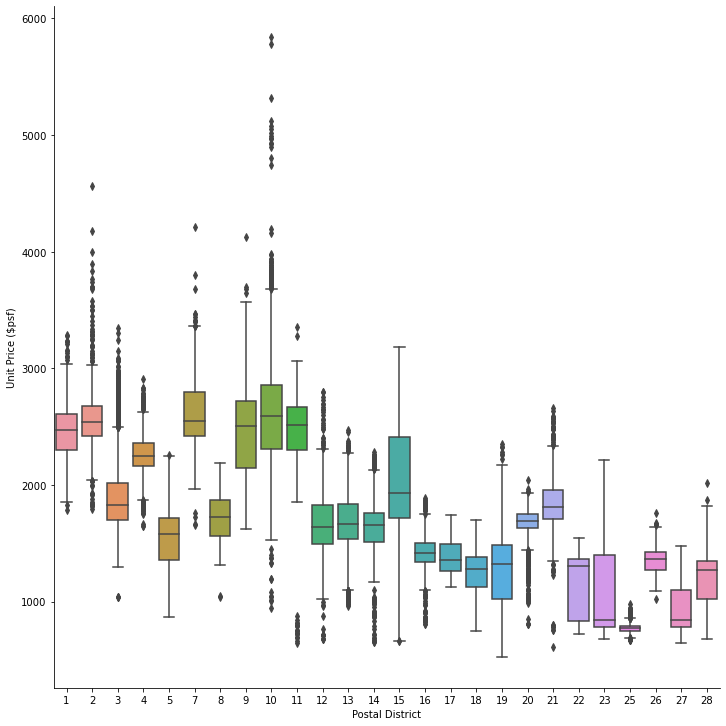

In [80]:
sns.catplot(x="Postal District", y='Unit Price ($psf)', data =df[cond1], kind = 'box', size = 10, height =10)


In [81]:
#Suppose we look at median as indicator for pricing in the districts. 
df[cond1].groupby('Postal District')[['Unit Price ($psf)']].median().sort_values(by = 'Unit Price ($psf)', 
                                                                          ascending = False).reset_index()

,Postal District,Unit Price ($psf)
0,10,2589.5
1,7,2547.0
2,2,2542.5
3,11,2518.0
4,9,2505.5
5,1,2469.5
6,4,2245.0
7,15,1928.0
8,3,1832.0
9,21,1810.0


In the past 5 years, the most expensive districts in terms of median is 10, 7, 2. 

In [82]:
df[cond1].groupby('Postal District')[['Unit Price ($psf)']].max().sort_values(by = 'Unit Price ($psf)', 
                                                                          ascending = False).reset_index()

,Postal District,Unit Price ($psf)
0,10,5838
1,2,4560
2,7,4213
3,9,4123
4,11,3353
5,3,3346
6,1,3285
7,15,3182
8,4,2908
9,12,2793


In the past 5 years, the most expensive districts in terms of maximum transacted price is 10, 2, 7. 

It would be interesting to see how the price of the top 3 districts developed through out the 5 years of in terms of their price... [District 10, 7, 2] 

In [83]:
cond5 = df[cond1]['Postal District'] == 10 
cond6 = df[cond1]['Postal District'] == 7 
cond7 = df[cond1]['Postal District'] == 2 

top3median = df[cond1][cond5 | cond6 | cond7]

In [84]:
top3median #total of 2829 transactions

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,tenure_start,lease_years
9,10,SKY EVERTON,EVERTON ROAD,Apartment,2,RCR,Freehold,New Sale,1,3744000,-,1346,Strata,26 to 30,2783,2021-05-01,Freehold,Freehold
24,25,ONE BERNAM,BERNAM STREET,Apartment,2,CCR,99 years leasehold,New Sale,1,1171000,-,452,Strata,11 to 15,2590,2021-05-01,leasehold,99
35,36,ONE BERNAM,BERNAM STREET,Apartment,2,CCR,99 years leasehold,New Sale,1,1075000,-,452,Strata,01 to 05,2378,2021-05-01,leasehold,99
47,48,ONE BERNAM,BERNAM STREET,Apartment,2,CCR,99 years leasehold,New Sale,1,1050000,-,441,Strata,01 to 05,2379,2021-05-01,leasehold,99
90,91,ONE BERNAM,BERNAM STREET,Apartment,2,CCR,99 years leasehold,New Sale,1,1119000,-,452,Strata,06 to 10,2475,2021-05-01,leasehold,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34538,112,GOODWOOD GRAND,BALMORAL ROAD,Strata Detached,10,CCR,Freehold,New Sale,1,6950000,-,5231,Strata,-,1329,2017-10-01,Freehold,Freehold
34539,113,GOODWOOD GRAND,BALMORAL ROAD,Strata Detached,10,CCR,Freehold,New Sale,1,6950000,-,5231,Strata,-,1329,2017-10-01,Freehold,Freehold
34540,114,BOTANIC @ CLUNY PARK,CLUNY PARK ROAD,Strata Detached,10,CCR,Freehold,New Sale,1,7450000,-,6232,Strata,-,1195,2017-09-01,Freehold,Freehold
34557,131,BOTANIC @ CLUNY PARK,CLUNY PARK ROAD,Strata Detached,10,CCR,Freehold,New Sale,1,6400000,-,6157,Strata,-,1039,2017-01-01,Freehold,Freehold


In [348]:
df3 = top3median.groupby(['Postal District', 'Date of Sale']).describe()['Unit Price ($psf)'].reset_index()
df3

,Postal District,Date of Sale,count,mean,std,min,25%,50%,75%,max
0,2,2016-07-01,1.0,1818.000000,NaN,1818.0,1818.00,1818.0,1818.00,1818.0
1,2,2016-08-01,2.0,2375.500000,23.334524,2359.0,2367.25,2375.5,2383.75,2392.0
2,2,2016-09-01,1.0,2334.000000,NaN,2334.0,2334.00,2334.0,2334.00,2334.0
3,2,2016-10-01,1.0,2296.000000,NaN,2296.0,2296.00,2296.0,2296.00,2296.0
4,2,2017-01-01,1.0,2970.000000,NaN,2970.0,2970.00,2970.0,2970.00,2970.0
5,2,2017-02-01,2.0,2507.500000,105.358910,2433.0,2470.25,2507.5,2544.75,2582.0
6,2,2017-03-01,2.0,2436.500000,142.128463,2336.0,2386.25,2436.5,2486.75,2537.0
7,2,2017-04-01,12.0,2378.833333,258.705812,1883.0,2224.75,2488.0,2566.00,2635.0
8,2,2017-05-01,1.0,2320.000000,NaN,2320.0,2320.00,2320.0,2320.00,2320.0
9,2,2017-06-01,8.0,2346.000000,510.869008,1795.0,2024.25,2186.5,2510.50,3187.0


 # Question 3
plot a relational graph with the number of lease years left, and the unit price psf, in the resale market. 

In [89]:
df.head()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,tenure_start,lease_years
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2002,99
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2014,99
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2002,99
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2005,99
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2005,99


In [362]:
df1.explode('tenure_start')['tenure_start'].value_counts() 

#Freehold, leasehold, 01/11/2017 and NA are nuisance in the tenure_commenence column, they will be dropped. 

2018    14302
2015     6646
2014     6639
2016     6150
2019     5351
2017     5242
2011     4690
2013     4321
2012     3952
2010     3505
1997     2533
2008     1908
1996     1677
1995     1444
2000     1272
2007     1264
2006     1093
1994      999
1885      934
2002      918
2009      887
2001      882
1993      806
1991      662
2004      660
1998      655
2005      546
1879      498
1877      491
1982      473
2020      454
1882      374
1999      363
2021      358
1928      293
1883      280
1992      263
1841      216
1878      208
1876      194
2003      187
1975      176
1977      172
1875      169
1955      152
1954      144
1886      129
1976      116
1979      105
1953       93
1990       85
1956       80
1884       73
1984       69
1938       66
1970       63
1986       62
1980       60
1968       60
1978       56
1937       44
1985       39
1827       38
1983       38
1973       33
1881       32
1874       32
1964       28
1981       25
1965       17
1974       15
1947  

In [348]:
df1 = df.drop(df[df['tenure_start'] == '01/11/2017'].index)

df1 = df.drop(df[df['tenure_start'] == 'NA'].index)

df1 = df.drop(df[df['tenure_start'] == 'leasehold'].index)

df1 = df.drop(df[df['tenure_start'] == 'Freehold'].index)

In [361]:
condA = df['tenure_start'] == '01/11/2017'
condB = df['tenure_start'] == 'NA'
condC = df['tenure_start'] == 'leasehold'
condD = df['tenure_start'] == 'Freehold'

df1 = df[~(condA | condB | condC | condD)]
df1.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99


In [363]:
df1.explode('lease_years')['lease_years'].value_counts() #rule - anything lease years above 110, is nuisance. drop. 

99        81747
999        4161
956         293
103         248
60          100
946          91
102          67
100          54
929          46
9999         32
947          31
70           25
110          23
101          19
85            7
999999        6
993           5
89            3
998           3
945           2
104           1
93            1
940           1
97            1
Name: lease_years, dtype: int64

In [364]:
#first, we convert lease_years and commenence to int. 
df1['tenure_start'] = df1['tenure_start'].astype(int)
df1['lease_years'] = df1['lease_years'].astype(int)
df1['year'] = df1['year'].astype(int)

<ipython-input-364-daa67d374ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tenure_start'] = df1['tenure_start'].astype(int)
<ipython-input-364-daa67d374ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lease_years'] = df1['lease_years'].astype(int)
<ipython-input-364-daa67d374ce4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [365]:
df1.drop(df1[df1['lease_years'] > 110].index, inplace=True)

C:\Users\kentj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [366]:
df.shape

(120925, 20)

In [367]:
df1['lease_left'] = df1['lease_years'] - (df1['year'] - df1['tenure_start'])
df1.head()

<ipython-input-367-ed014e00d4e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lease_left'] = df1['lease_years'] - (df1['year'] - df1['tenure_start'])


,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years,lease_left
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99,80
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99,92
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99,80
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99,83
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99,83


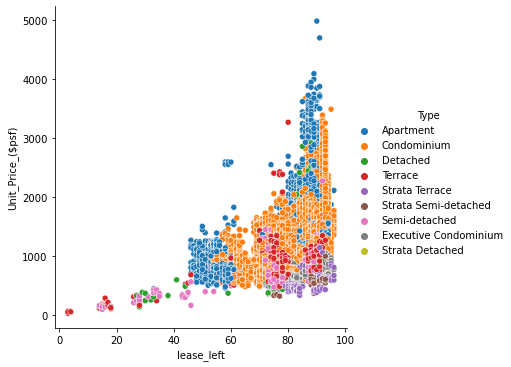

In [368]:
resalecond = df1['Type_of_Sale'] == 'Resale'

sns.relplot(x='lease_left', y='Unit_Price_($psf)', data = df1[resalecond], hue = 'Type')